In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
root_dir = os.getcwd()
sys.path.append(root_dir)

In [4]:
from src import datatypes, definitions, electron_functions, tools

In [5]:
cartesiandensity = datatypes.CartesianElectronDensity(resolution={'x': 25, 'y': 25, 'z': 25}, r_max=2)

In [6]:
cartesiandensity.eval_density(2, 1, 0)

/Users/patrickrowe/Documents/Code/Python/orbitals/src/electron_functions.py:83: RuntimeWarning: invalid value encountered in scalar divide
  phi = np.arccos(z / r)


In [7]:
plot_density = tools.clip_density(cartesiandensity, 0.5)

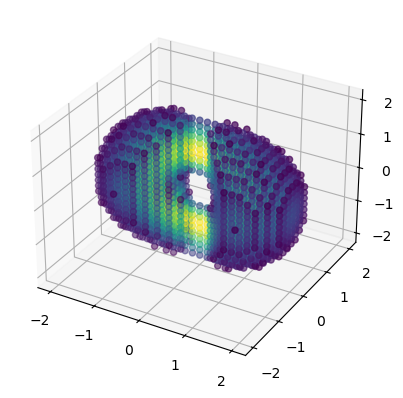

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xx, yy, zz = cartesiandensity.meshgrid_coords()

ax.scatter3D(xs=xx, ys=yy, zs=zz, c=plot_density)

plt.show()

In [26]:
[(x, y, z) for x, y, z in zip(
        cartesiandensity.density.coords['x'].data,
        cartesiandensity.density.coords['y'].data,
        cartesiandensity.density.coords['z'].data,
    )
]

[(-2.0, -2.0, -2.0),
 (-1.8333333333333333, -1.8333333333333333, -1.8333333333333333),
 (-1.6666666666666667, -1.6666666666666667, -1.6666666666666667),
 (-1.5, -1.5, -1.5),
 (-1.3333333333333335, -1.3333333333333335, -1.3333333333333335),
 (-1.1666666666666667, -1.1666666666666667, -1.1666666666666667),
 (-1.0, -1.0, -1.0),
 (-0.8333333333333335, -0.8333333333333335, -0.8333333333333335),
 (-0.6666666666666667, -0.6666666666666667, -0.6666666666666667),
 (-0.5, -0.5, -0.5),
 (-0.3333333333333335, -0.3333333333333335, -0.3333333333333335),
 (-0.16666666666666674, -0.16666666666666674, -0.16666666666666674),
 (0.0, 0.0, 0.0),
 (0.16666666666666652, 0.16666666666666652, 0.16666666666666652),
 (0.33333333333333304, 0.33333333333333304, 0.33333333333333304),
 (0.5, 0.5, 0.5),
 (0.6666666666666665, 0.6666666666666665, 0.6666666666666665),
 (0.833333333333333, 0.833333333333333, 0.833333333333333),
 (1.0, 1.0, 1.0),
 (1.1666666666666665, 1.1666666666666665, 1.1666666666666665),
 (1.333333333

In [29]:
relative_threshold = 0.8

density = cartesiandensity.get_density()
dens_range = np.nanmax(density) - np.nanmin(density)
abs_threshold = relative_threshold * dens_range

verts, faces, normals, values = ski.measure.marching_cubes(
    volume=density, 
    level=abs_threshold, 
)

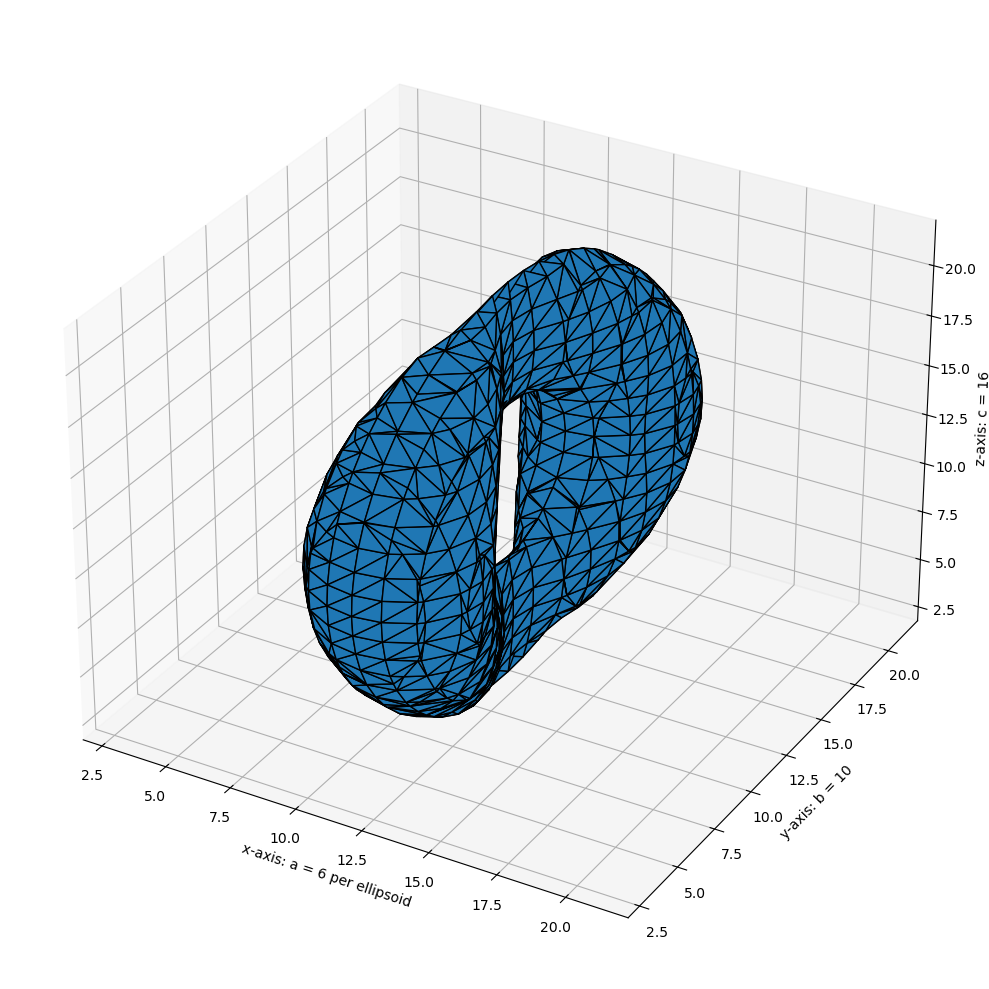

In [42]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(verts.min(), verts.max())
ax.set_ylim(verts.min(), verts.max())
ax.set_zlim(verts.min(), verts.max())

plt.tight_layout()
plt.show()